In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import os

ROOT_PATH = Path('/mnt/2021_NIA_data/projects/nbb')
VIDEO_PATH = ROOT_PATH.joinpath("video")

# Determine the project path based on the current working directory or the script's path
try:
    PROJECT_PATH = Path(__file__).parents[1]
except NameError:
    PROJECT_PATH = Path(os.getcwd()).parents[0]

HEADPOSE_PATH = Path(PROJECT_PATH, "data/headpose_data")
FIGURE_PATH = Path(PROJECT_PATH, "figures")

# Read the CSV file
data = pd.read_csv(str(Path(HEADPOSE_PATH, "headpose_values1.csv")))

# Group the data by participant_id
grouped_data = data.groupby('participant_id')

In [2]:
print("Number of participants:", len(grouped_data))
print("Participant IDs:", grouped_data.groups.keys())

Number of participants: 9
Participant IDs: dict_keys(['td001', 'td002', 'td005', 'td006', 'td007', 'td008', 'td009', 'td010', 'td011'])


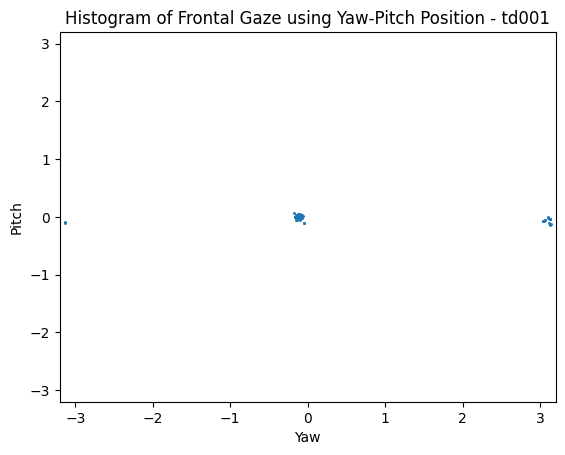

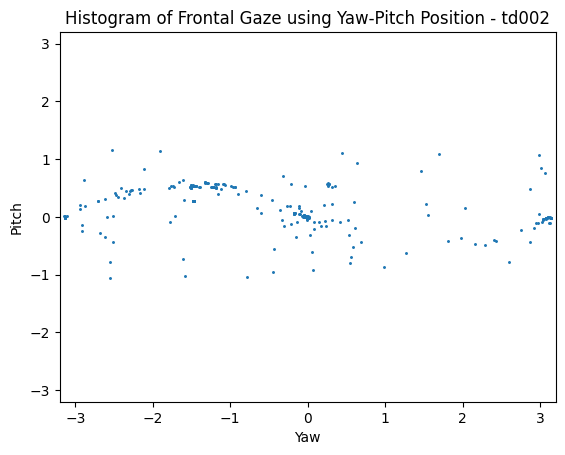

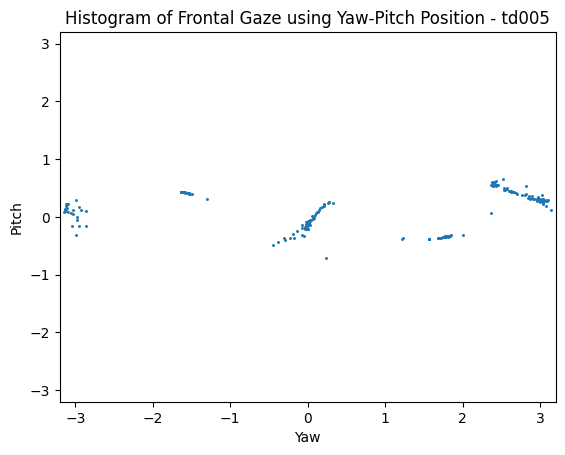

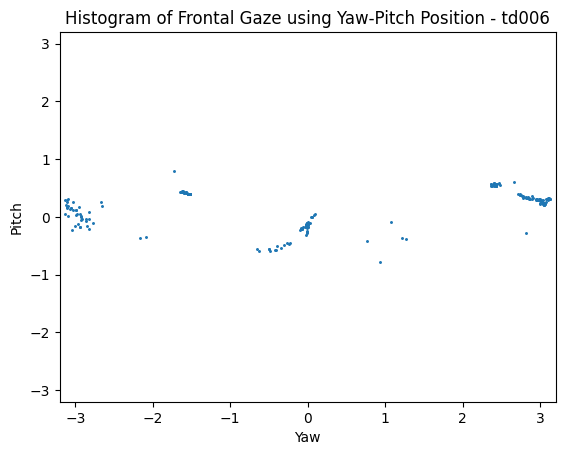

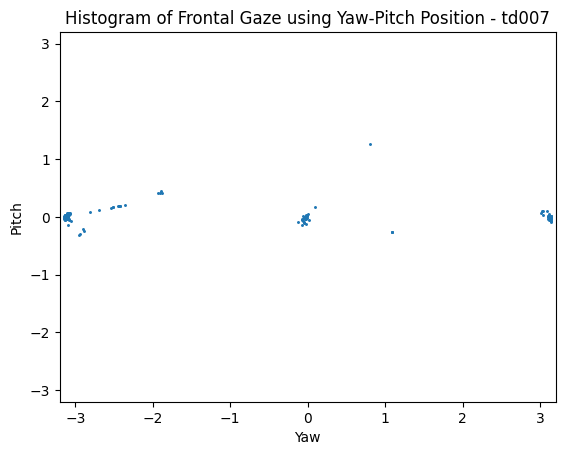

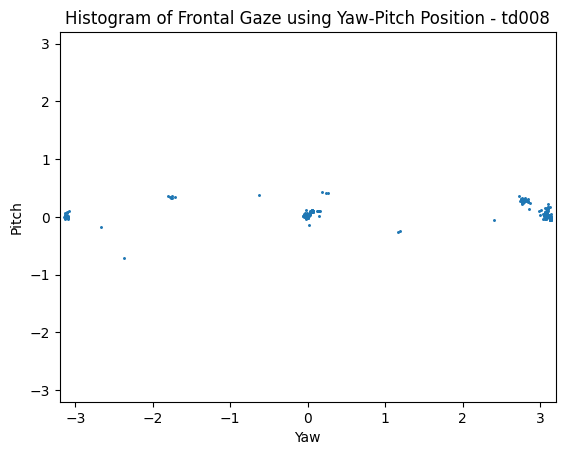

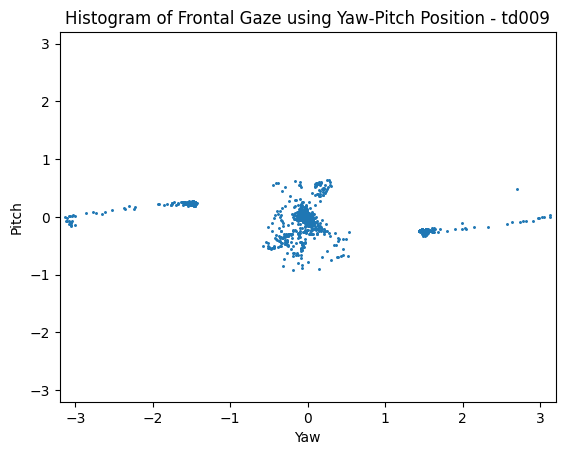

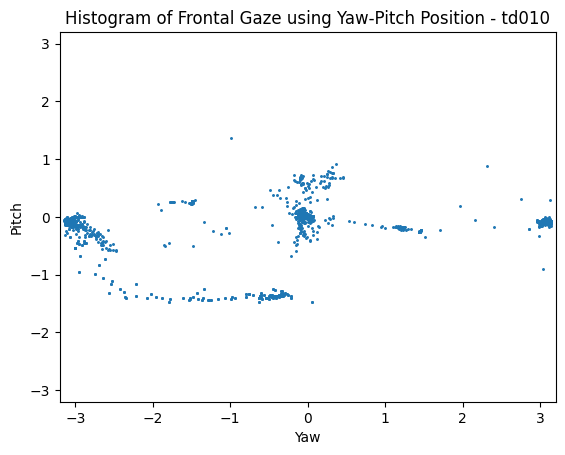

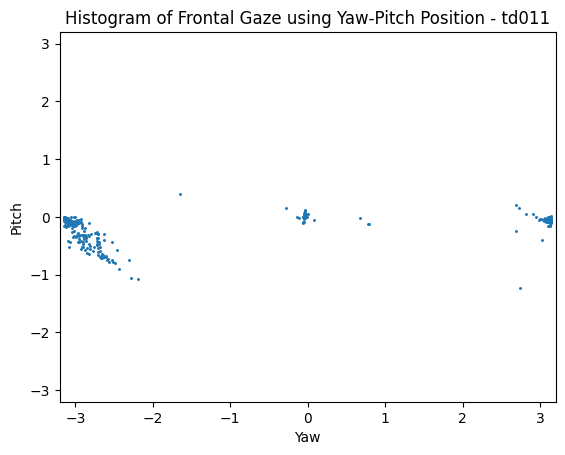

In [3]:
for participant_id, participant_data in grouped_data:
    # Extract yaw and pitch values for the current participant
    yaw_values = participant_data['yaw'] 
    pitch_values = participant_data['pitch']

    yaw = yaw_values 
    pitch = pitch_values

    # Create the Cartesian scatter plot for the current participant
    fig, ax = plt.subplots()
    ax.scatter(yaw, pitch, marker='.', s=5)
    
    # Set the range of x and y values
    ax.set_xlim(-3.2, 3.2)
    ax.set_ylim(-3.2, 3.2)

    # Set labels and title
    ax.set_title(f'Histogram of Frontal Gaze using Yaw-Pitch Position - {participant_id}')
    ax.set_xlabel('Yaw')
    ax.set_ylabel('Pitch')

    # Save the scatter plot for the current participant as an image file (optional)
    plt.savefig(str(Path(FIGURE_PATH, f'participant_{participant_id}_scatter_plot.png')))

    # Display the scatter plot for the current participant
    plt.show()